# Maestría en Maestría en Ciencia de Datos e Inteligencia Artificial
#### 8. Machine Learning and Deep Learning
#### Docente: Msc. Renzo Claure Aracena.

### Probabilidad, Curvas ROC

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
cancer = pd.read_csv('../datasets/cancer.csv', delimiter = ";", decimal=",")

In [3]:
X = cancer.drop(['Tipo', 'ID'], axis=1)
y = cancer['Tipo'].replace(['M', 'B'], [1,0])

X_train, X_test, y_train, y_test = train_test_split(X, y)

C:\Users\renzo\AppData\Local\Temp\ipykernel_22004\1601619350.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = cancer['Tipo'].replace(['M', 'B'], [1,0])


In [4]:
# Score de Clasificacion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

lr = LogisticRegression(max_iter=500).fit(X_train, y_train)
lr_pred = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_pred)
confusion

array([[74,  5],
       [ 7, 57]])

In [5]:
lr.score(X_test, y_test)

0.916083916083916

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
y_scores_lr = lr.decision_function(X_test)
lr_pred = lr.predict(X_test)
y_score_list = list(zip(y_test[0:20], lr_pred[0:20], y_scores_lr[0:20]))

y_score_list

[(1, np.int64(0), np.float64(-0.17368483704592563)),
 (0, np.int64(0), np.float64(-1.221672431600627)),
 (0, np.int64(0), np.float64(-2.6062681534903795)),
 (0, np.int64(0), np.float64(-1.7792563201195755)),
 (0, np.int64(0), np.float64(-3.2027581145918305)),
 (0, np.int64(0), np.float64(-4.15711178620688)),
 (0, np.int64(0), np.float64(-1.7445915862274894)),
 (0, np.int64(0), np.float64(-4.148521651272986)),
 (0, np.int64(0), np.float64(-7.212913721957339)),
 (0, np.int64(0), np.float64(-5.999900097025494)),
 (0, np.int64(1), np.float64(0.20095602700111215)),
 (0, np.int64(1), np.float64(0.5407742274110845)),
 (0, np.int64(0), np.float64(-5.762953194528237)),
 (0, np.int64(1), np.float64(1.1516809699896804)),
 (0, np.int64(0), np.float64(-0.745468432791224)),
 (1, np.int64(1), np.float64(0.06231467042115213)),
 (0, np.int64(0), np.float64(-5.0631266527108245)),
 (1, np.int64(1), np.float64(7.3564223211627)),
 (1, np.int64(1), np.float64(6.115651543267713)),
 (1, np.int64(1), np.float6

In [7]:
# Probabilidad de Clasificacion
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], lr_pred[0:20], y_proba_lr[0:20,1]))


y_proba_list

[(1, np.int64(0), np.float64(0.5223167111557689)),
 (0, np.int64(0), np.float64(0.2153602681065881)),
 (0, np.int64(0), np.float64(0.07010019609974394)),
 (0, np.int64(0), np.float64(0.14115453193329064)),
 (0, np.int64(0), np.float64(0.036875481397302234)),
 (0, np.int64(0), np.float64(0.01523204303546159)),
 (0, np.int64(0), np.float64(0.16049875925455406)),
 (0, np.int64(0), np.float64(0.014490302495174209)),
 (0, np.int64(0), np.float64(0.00036070295507979256)),
 (0, np.int64(0), np.float64(0.0023014259607580284)),
 (0, np.int64(1), np.float64(0.6632946850370538)),
 (0, np.int64(1), np.float64(0.6396607627702313)),
 (0, np.int64(0), np.float64(0.002268316285406866)),
 (0, np.int64(1), np.float64(0.7328673705643686)),
 (0, np.int64(0), np.float64(0.3849010643463398)),
 (1, np.int64(1), np.float64(0.6000686006042966)),
 (0, np.int64(0), np.float64(0.005871715205729358)),
 (1, np.int64(1), np.float64(0.9987040622925668)),
 (1, np.int64(1), np.float64(0.9971769802441247)),
 (1, np.int6

In [8]:
lr.score(X_test, y_test)

0.9090909090909091

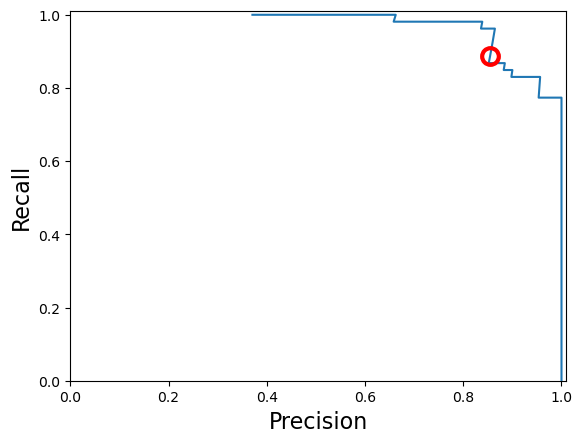

In [9]:
# Curva Precision Recall
from sklearn.metrics import precision_recall_curve

precision, recall, umbral = precision_recall_curve(y_test, y_scores_lr)
cercano_cero = np.argmin(np.abs(umbral))
cercano_cero_p = precision[cercano_cero]
cercano_cero_r = recall[cercano_cero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curva')
plt.plot(cercano_cero_p, cercano_cero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
#plt.axes().set_aspect('equal')
plt.show()

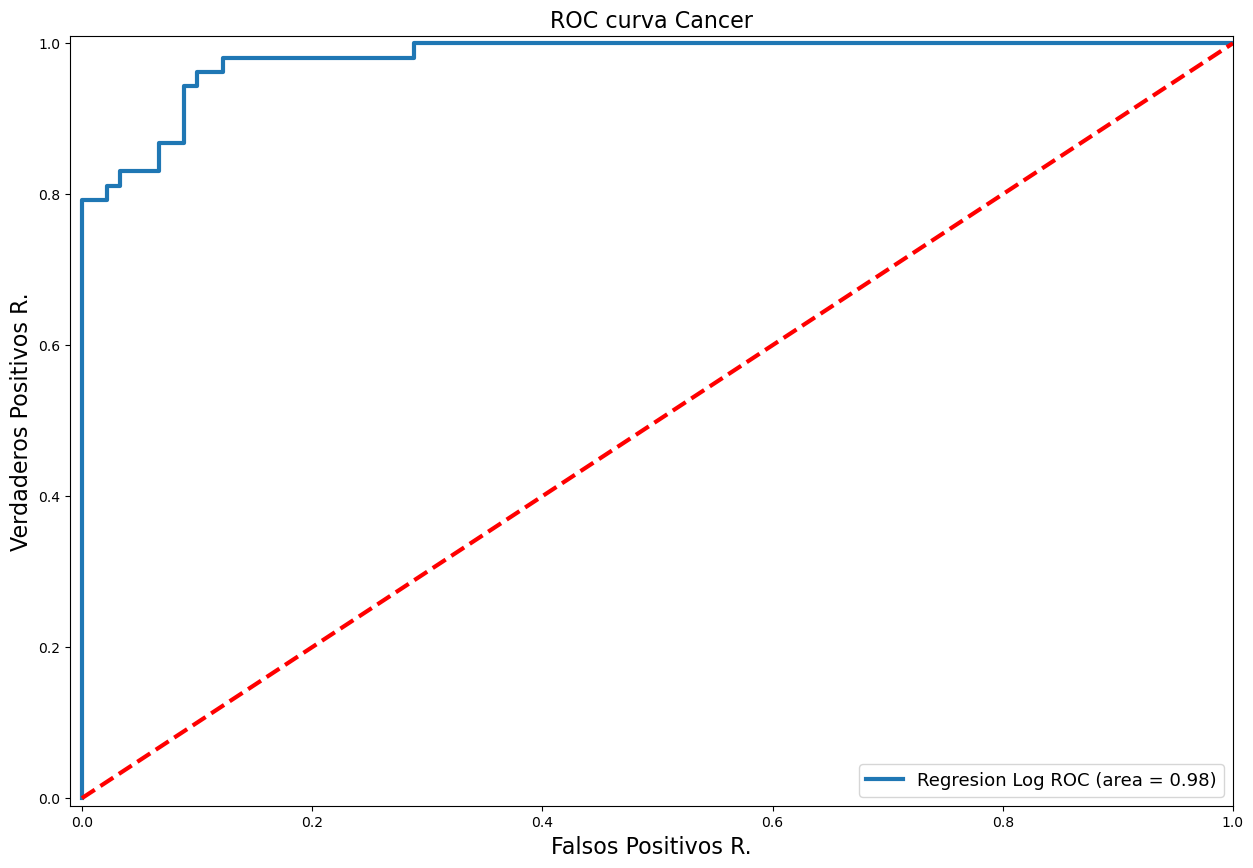

In [10]:
#Curva ROC
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

y_score_rl = lr.fit(X_train, y_train).decision_function(X_test)
fpr_rl, tpr_rl, _ = roc_curve(y_test, y_score_rl)
roc_auc_rl = auc(fpr_rl, tpr_rl)

plt.figure(figsize=(15, 10))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rl, tpr_rl, lw=3, label='Regresion Log ROC (area = {:0.2f})'.format(roc_auc_rl))
plt.xlabel('Falsos Positivos R.', fontsize=16)
plt.ylabel('Verdaderos Positivos R.', fontsize=16)
plt.title('ROC curva Cancer', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='red', lw=3, linestyle='--')
#plt.axes().set_aspect('equal')
plt.show()

In [11]:
from matplotlib import cm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Gamma: 0.001  Accuracy: 0.916 Auc: 0.953
Gamma: 0.100  Accuracy: 0.713 Auc: 0.907
Gamma: 0.200  Accuracy: 0.664 Auc: 0.897
Gamma: 0.500  Accuracy: 0.629 Auc: 0.883
Gamma: 1.000  Accuracy: 0.629 Auc: 0.876


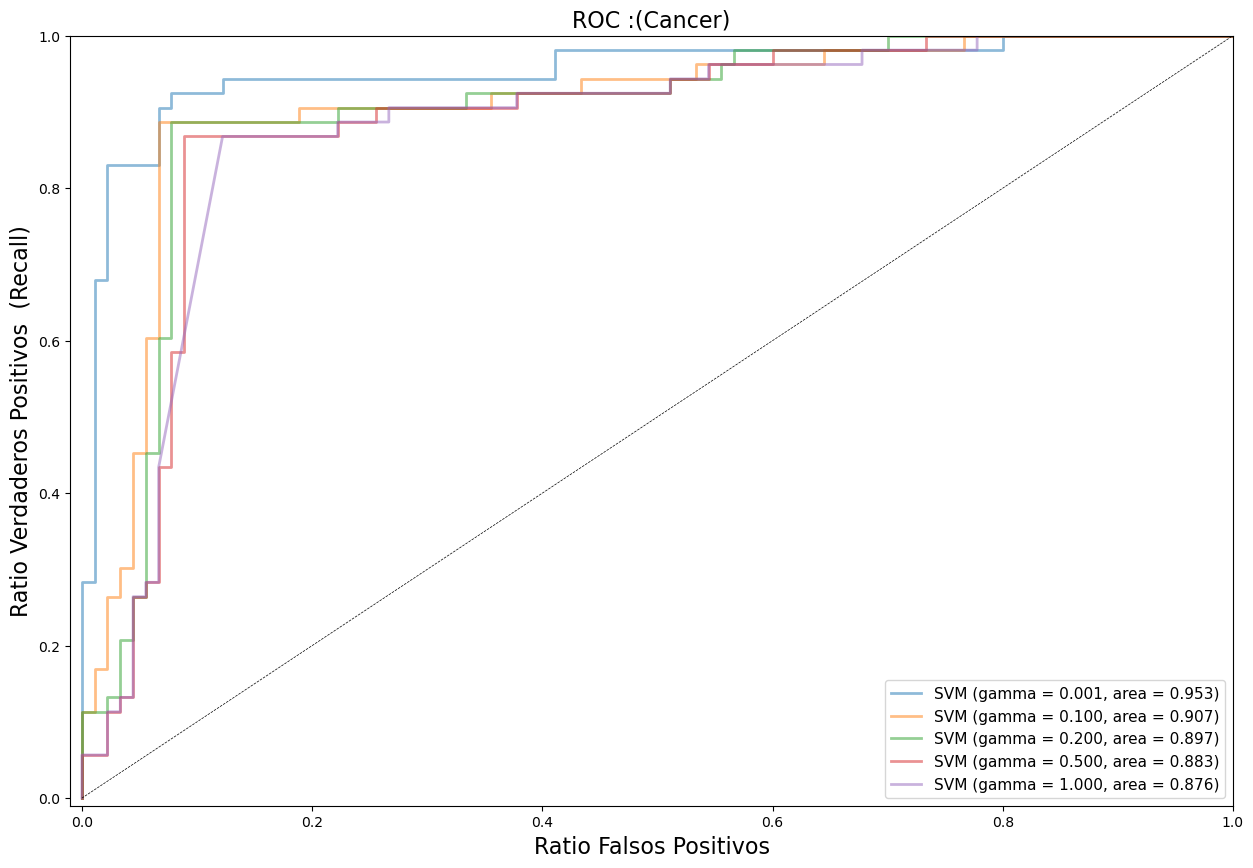

In [12]:
# Curva ROC para comparar más de un modelo
%matplotlib inline

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

plt.figure(figsize=(15, 10))
plt.xlim([-0.01, 1])
plt.ylim([-0.01, 1])
for gi in [0.001, 0.1, 0.2, 0.5, 1 ]:
    svm = SVC(gamma =gi ).fit(X_train, y_train)
    y_score = svm.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    accuracy = svm.score(X_test, y_test)
    print('Gamma: {:.3f}  Accuracy: {:.3f} Auc: {:.3f}'.format(gi, accuracy, roc_auc))
    plt.plot(fpr, tpr, lw=2, alpha=0.5, label='SVM (gamma = {:0.3f}, area = {:0.3f})'.format(gi, roc_auc))

plt.xlabel('Ratio Falsos Positivos', fontsize=16)
plt.ylabel('Ratio Verdaderos Positivos  (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC :(Cancer)', fontsize=16)
#plt.axes().set_aspect('equal')

plt.show()
    
    

### Evaluación de modelos de clasificación multinivel

#### Evaluación pseudidicotómica

In [13]:
base = pd.read_csv('../datasets/COMPRA DE PRODUCTOS.csv', delimiter=";", decimal=',')
base.head()

,ID,GRUPO_PRODUCTO,CON_LINEA_CREDITO,INGRESO_NETO,INGRESO_ITEM_1,INGRESO_ITEM_2,MESES_ANTIGUEDAD
0,130,4,SI,39.239862,15.797045,14.423,116
1,133,4,SI,8.671353,6.059353,0.000,68
2,238,2,SI,168.801714,82.770594,69.167,99
3,251,2,SI,115.562372,93.957372,0.725,30
4,273,4,SI,32.645475,17.150819,10.723,60


In [14]:
X, y = base.drop(['ID', 'GRUPO_PRODUCTO', 'CON_LINEA_CREDITO'], axis=1), base['GRUPO_PRODUCTO']
y.value_counts()

GRUPO_PRODUCTO
4    4929
2    3940
3     856
1     275
Name: count, dtype: int64

Text(0.5, 58.7222222222222, 'Prediccion')

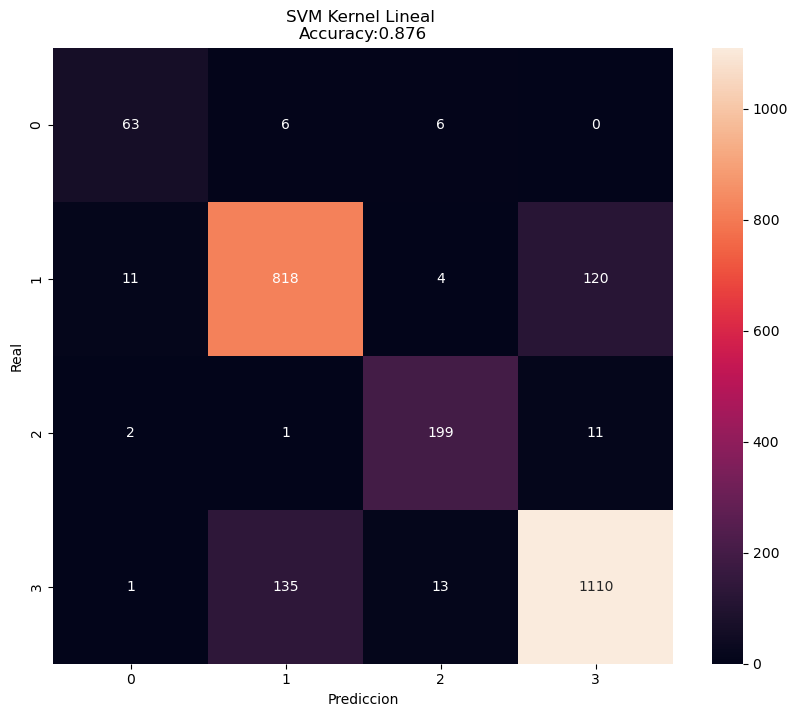

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay


X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state=0)

dt = DecisionTreeClassifier().fit(X_train_mc, y_train_mc)
svm_predicted_mc = dt.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,4)], columns = [i for i in range(0,4)])

plt.figure(figsize=(10,8))
sns.heatmap(df_cm, annot=True, fmt='.0f')
plt.title('SVM Kernel Lineal \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                       svm_predicted_mc)))
plt.ylabel('Real')
plt.xlabel('Prediccion')

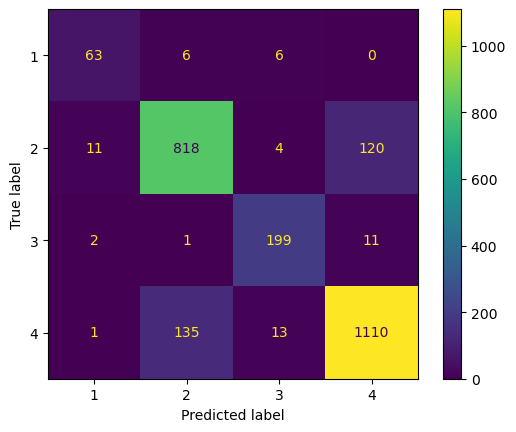

In [19]:
disp = ConfusionMatrixDisplay(confusion_mc,display_labels=dt.classes_)
disp.plot()

In [ ]:
svm = SVC(kernel = 'rbf').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,4)],
                  columns = [i for i in range(0,4)])

plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True, cmap="BuPu")
plt.title('SVM Kernel RBF \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                    svm_predicted_mc)))
plt.ylabel('Real')
plt.xlabel('Prediccion');

In [ ]:
disp = ConfusionMatrixDisplay(confusion_mc,display_labels=ad.classes_)
disp.plot()

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test_mc, svm_predicted_mc))


              precision    recall  f1-score   support

           1       0.82      0.84      0.83        75
           2       0.85      0.86      0.86       953
           3       0.90      0.93      0.91       213
           4       0.89      0.88      0.89      1259

    accuracy                           0.88      2500
   macro avg       0.87      0.88      0.87      2500
weighted avg       0.88      0.88      0.88      2500



#### Macro y Micro precisión, recall y F1

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Micro precision: {:.2f}'.format(precision_score(y_test_mc, svm_predicted_mc, average='micro')))
print('Macro precision: {:.2f}'.format(precision_score(y_test_mc, svm_predicted_mc, average='macro')))
print('Micro recall: {:.2f}'.format(recall_score(y_test_mc, svm_predicted_mc, average='micro')))
print('Macro recall: {:.2f}'.format(recall_score(y_test_mc, svm_predicted_mc, average='macro')))
print('Micro F1: {:.2f}'.format(f1_score(y_test_mc, svm_predicted_mc, average='micro')))
print('Macro F1: {:.2f}'.format(f1_score(y_test_mc, svm_predicted_mc, average='macro')))

Micro precision: 0.88
Macro precision: 0.87
Micro recall: 0.88
Macro recall: 0.88
Micro F1: 0.88
Macro F1: 0.87


**Realicen el mismo ejercicio con árboles de desición**